Processed Data:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1       

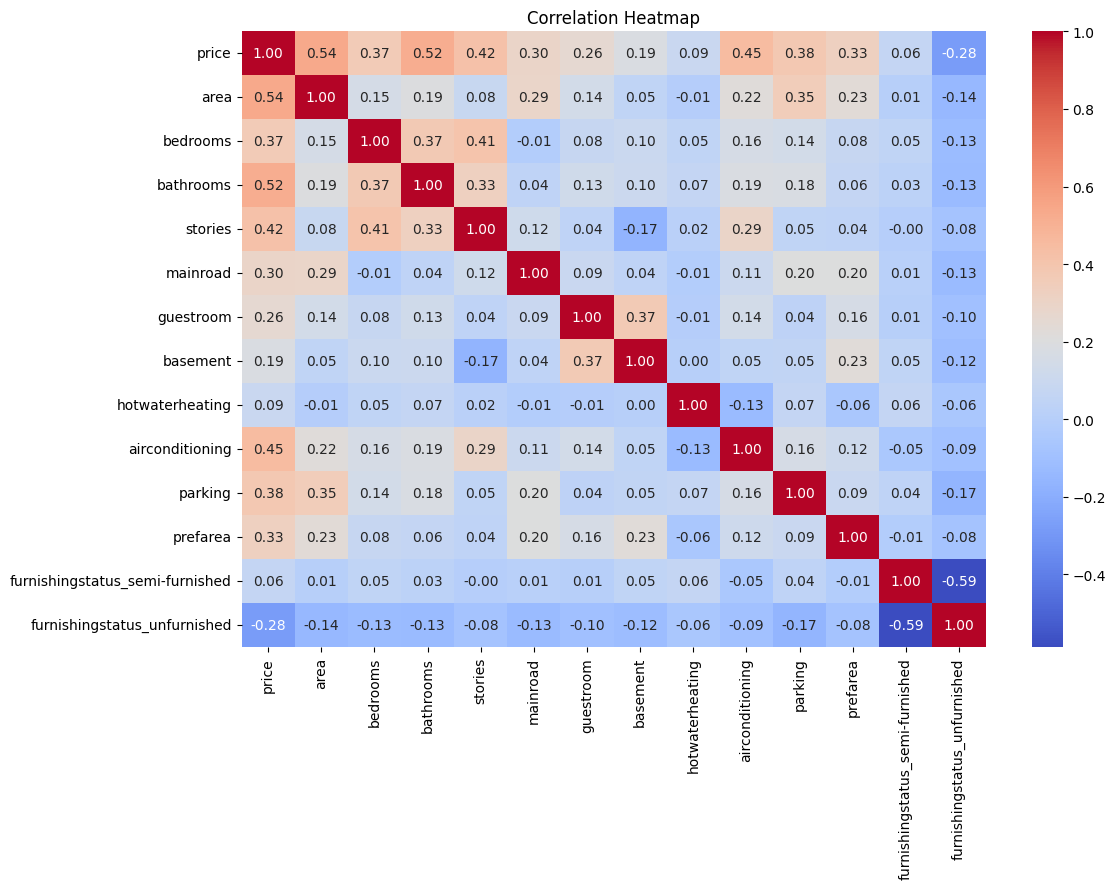


Pairs with correlation > 0.7:
                          Variable1                     Variable2  Correlation
0                             price                          area     0.535997
2                             price                     bathrooms     0.517545
90  furnishingstatus_semi-furnished  furnishingstatus_unfurnished    -0.588405


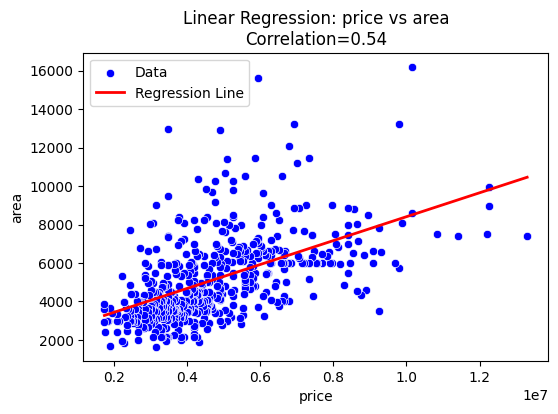

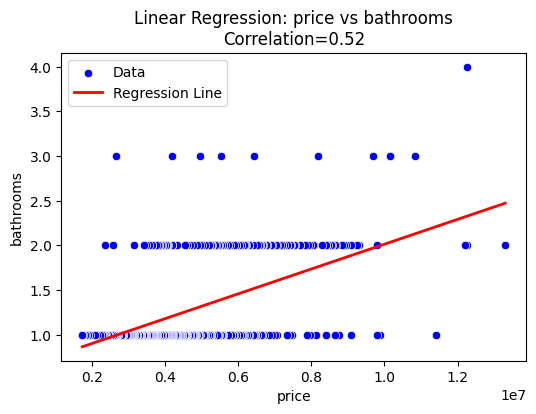

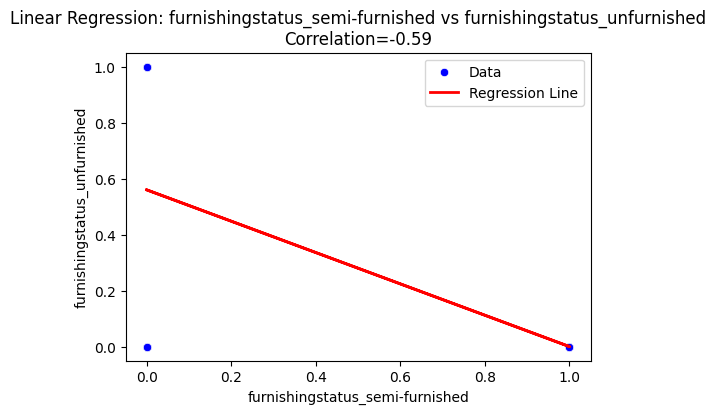

In [2]:
# ===============================
# Housing Dataset - Preprocessing,
# Correlation, and Linear Regression
# ===============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Load the dataset
# (You can also replace this with pd.read_csv("housing.csv"))
#data = """paste your dataset text here"""  # <-- replace with your csv or text
# If you already have it in a DataFrame, skip this step

# If it's already a DataFrame:
# df = your_dataframe

# Example if file exists:
df = pd.read_csv("Housing.csv")

# 2. Preprocessing: Convert categorical to numeric
df = df.copy()
# yes/no → 1/0
binary_cols = ["mainroad", "guestroom", "basement", 
               "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_cols:
    df[col] = df[col].map({"yes":1, "no":0})

# Furnishingstatus → One-hot encoding
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

print("Processed Data:")
print(df.head())

# 3. Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Find pairs with correlation > 0.7 (excluding self)
threshold = 0.5
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Variable1", "Variable2", "Correlation"]
strong_pairs = corr_pairs[corr_pairs["Correlation"].abs() > threshold]

print("\nPairs with correlation > 0.7:")
print(strong_pairs)

# 5. Linear Regression for each pair and plot
for idx, row in strong_pairs.iterrows():
    x_var = row["Variable1"]
    y_var = row["Variable2"]

    X = df[[x_var]].values
    y = df[y_var].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot scatter + regression line
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X.flatten(), y=y, color="blue", label="Data")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f"Linear Regression: {x_var} vs {y_var}\nCorrelation={row['Correlation']:.2f}")
    plt.legend()
    plt.show()


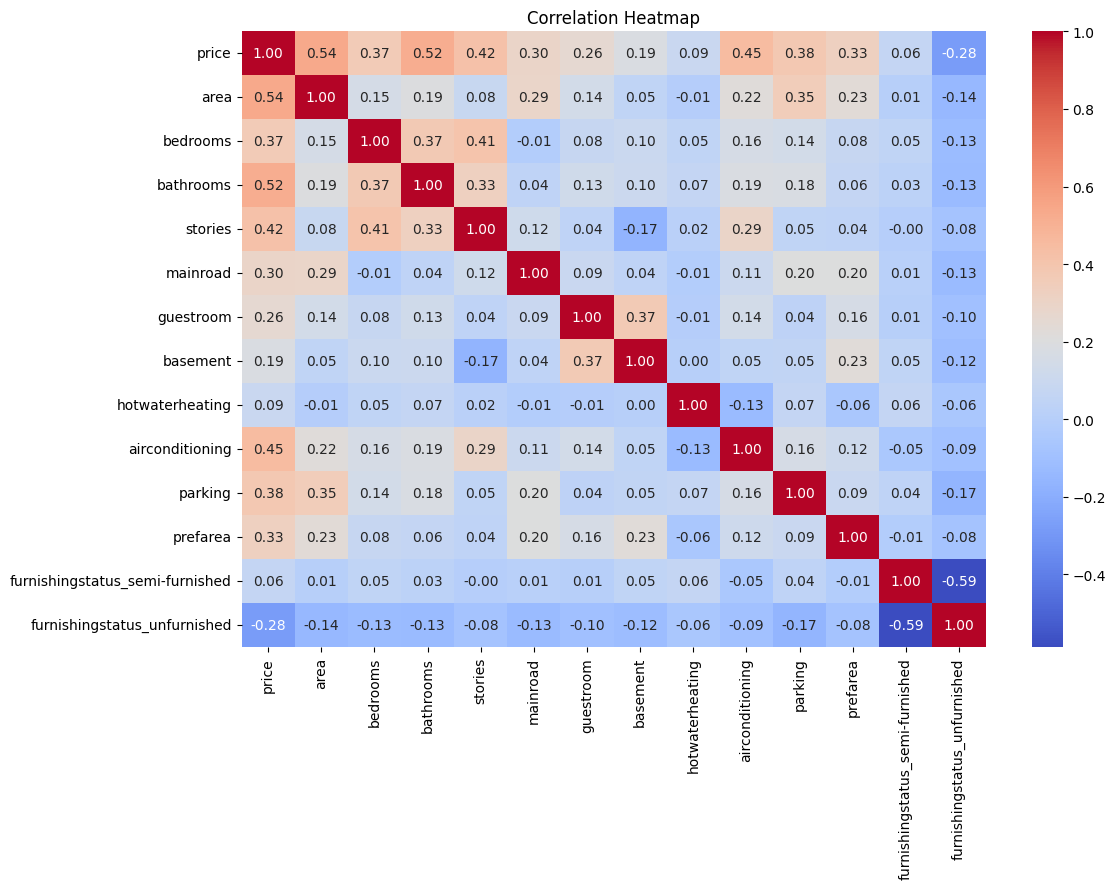

Selected Features (|corr| > 0.4 with price):
['area', 'bathrooms', 'airconditioning']

===== Model Performance =====
R² Score: 0.498
Mean Absolute Error (MAE): 1228450.98
Root Mean Squared Error (RMSE): 1593702.46


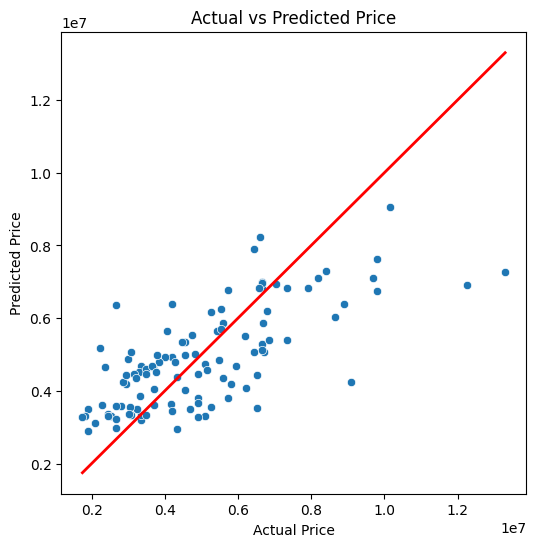

In [4]:
# ===============================
# Predict Housing Price using correlation-based feature selection
# ===============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("Housing.csv")   # <-- adjust file path

# 2. Preprocessing
# Map yes/no → 1/0
binary_cols = ["mainroad", "guestroom", "basement", 
               "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_cols:
    df[col] = df[col].map({"yes":1, "no":0})

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

# 3. Correlation matrix
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Select features with |correlation with price| > 0.4
target = "price"
correlations = corr[target].drop(target)
selected_features = correlations[correlations.abs() > 0.45].index.tolist()

print("Selected Features (|corr| > 0.4 with price):")
print(selected_features)

# 5. Split dataset
X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n===== Model Performance =====")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 9. Plot Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)  # y=x line
plt.show()


In [5]:
# ==============================
# Simple Linear Regression (one-on-one) with feature selection by correlation
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ---------- 1) Load ----------
# If your file is named differently, change the path below.
CSV_PATH = "Housing.csv"   # e.g., r"H:\folder\Housing.csv"
df = pd.read_csv(CSV_PATH)

# ---------- 2) Preprocessing ----------
# Map yes/no → 1/0 for binary columns
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower().map({"yes": 1, "no": 0})

# One-hot encode furnishingstatus (keep all dummies so nothing is lost)
if "furnishingstatus" in df.columns:
    df["furnishingstatus"] = df["furnishingstatus"].str.strip().str.lower()
    df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=False)

# Ensure expected numeric columns are numeric
numeric_like = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
for col in numeric_like:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where price is missing or invalid
df = df.dropna(subset=["price"]).reset_index(drop=True)

# ---------- 3) Correlation & feature selection (|corr| > 0.4) ----------
# Keep only numeric columns for correlation
num_df = df.select_dtypes(include=[np.number]).copy()

if "price" not in num_df.columns:
    raise ValueError("Column 'price' not found or not numeric after preprocessing.")

corr = num_df.corr()
corr_with_price = corr["price"].drop(labels=["price"])

# threshold (absolute)
THRESH = 0.4
selected_features = corr_with_price[corr_with_price.abs() > THRESH].index.tolist()

print(f"Selected features with |corr| > {THRESH} vs price:")
print(selected_features if selected_features else "(none met the threshold)")

# ---------- 4) Simple Linear Regression for each selected feature ----------
def run_simple_lr_and_plot(df, feature, target="price"):
    # Drop NaNs in the two columns used
    sub = df[[feature, target]].dropna().copy()
    if sub.empty:
        print(f"[{feature}] No valid data after dropping NaNs. Skipping.")
        return

    X = sub[[feature]].values
    y = sub[target].values

    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    print(f"\n===== Simple Linear Regression: {feature} vs {target} =====")
    print(f"Samples: {len(sub)}")
    print(f"R²   : {r2:.4f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"Slope (coef): {lr.coef_[0]:.6f}")
    print(f"Intercept   : {lr.intercept_:.2f}")

    # Plot scatter + regression line
    plt.figure(figsize=(6.5, 4.5))
    plt.scatter(X, y, alpha=0.6, label="Data")
    # Sort X for a clean line
    order = np.argsort(X.flatten())
    plt.plot(X.flatten()[order], y_pred[order], linewidth=2, label="Regression line", color="red")
    plt.xlabel(feature)
    plt.ylabel(target.capitalize())
    plt.title(f"{target.capitalize()} vs {feature} (Simple LR)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# If you want to only run on specific features you already identified:
# selected_features = ['area', 'bathrooms', 'airconditioning']

for feat in selected_features:
    run_simple_lr_and_plot(df, feat, target="price")


Selected features with |corr| > 0.4 vs price:
['area', 'bathrooms', 'stories', 'airconditioning']


TypeError: got an unexpected keyword argument 'squared'

Selected features with |corr| > 0.4 vs price:
['area', 'bathrooms', 'stories', 'airconditioning']

===== Simple Linear Regression: area vs price =====
Samples: 545
R²   : 0.2873
RMSE : 1577612.56
Slope (coef): 461.974894
Intercept   : 2387308.48


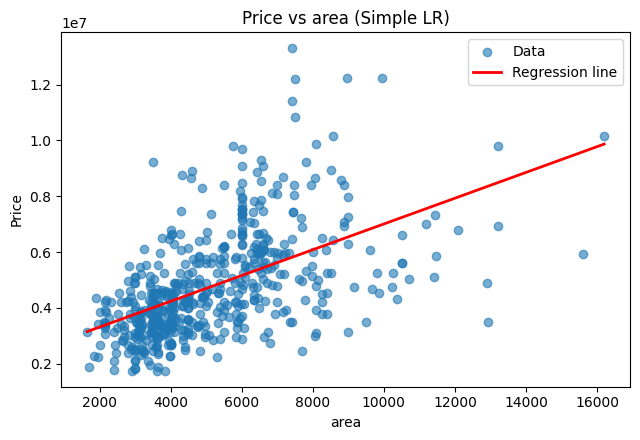


===== Simple Linear Regression: bathrooms vs price =====
Samples: 545
R²   : 0.2679
RMSE : 1598983.50
Slope (coef): 1926558.890106
Intercept   : 2288714.97


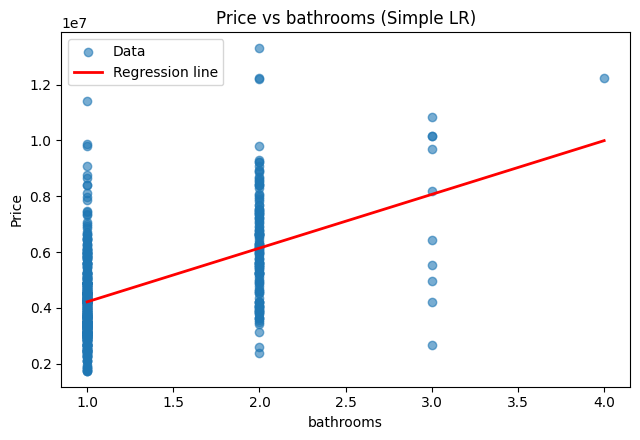


===== Simple Linear Regression: stories vs price =====
Samples: 545
R²   : 0.1770
RMSE : 1695294.29
Slope (coef): 907116.903197
Intercept   : 3128925.52


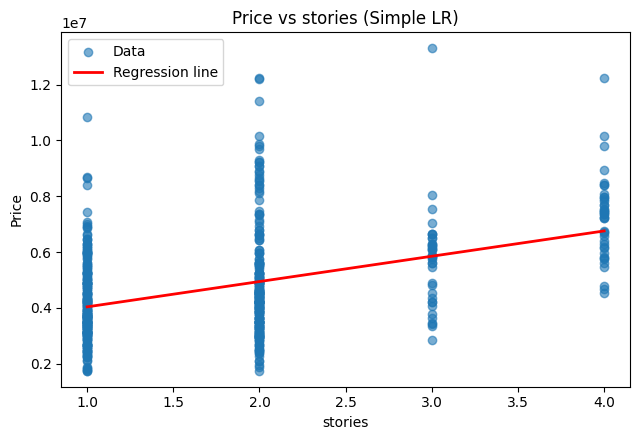


===== Simple Linear Regression: airconditioning vs price =====
Samples: 545
R²   : 0.2052
RMSE : 1666029.65
Slope (coef): 1821280.903111
Intercept   : 4191939.68


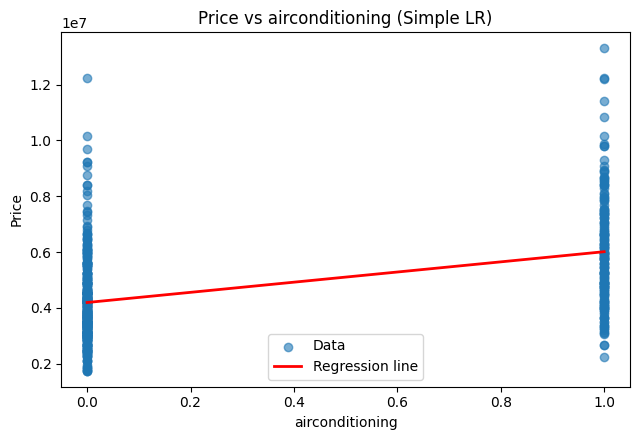

In [6]:
# ==============================
# Simple Linear Regression (one-on-one) with feature selection by correlation
# Works with old/new scikit-learn (no 'squared=' issue)
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ---------- 0) Helper: version-safe RMSE ----------
def rmse_score(y_true, y_pred):
    """Return RMSE; works even if sklearn doesn't support squared=False."""
    try:
        # Newer sklearn
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        # Older sklearn fallback
        return np.sqrt(mean_squared_error(y_true, y_pred))

# ---------- 1) Load ----------
CSV_PATH = "Housing.csv"   # change if needed
df = pd.read_csv(CSV_PATH)

# ---------- 2) Preprocessing ----------
# Map yes/no → 1/0 for binary columns
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip().str.lower()
            .map({"yes": 1, "no": 0})
        )

# One-hot encode furnishingstatus (keep all dummies)
if "furnishingstatus" in df.columns:
    df["furnishingstatus"] = df["furnishingstatus"].astype(str).str.strip().str.lower()
    df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=False)

# Force numeric types for key columns
numeric_like = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
for col in numeric_like:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where price is missing
df = df.dropna(subset=["price"]).reset_index(drop=True)

# ---------- 3) Correlation & feature selection (|corr| > 0.4) ----------
num_df = df.select_dtypes(include=[np.number]).copy()
if "price" not in num_df.columns:
    raise ValueError("Column 'price' not found or not numeric after preprocessing.")

corr = num_df.corr()
corr_with_price = corr["price"].drop(labels=["price"])
THRESH = 0.4
selected_features = corr_with_price[corr_with_price.abs() > THRESH].index.tolist()

print(f"Selected features with |corr| > {THRESH} vs price:")
print(selected_features if selected_features else "(none met the threshold)")

# ---------- 4) Simple Linear Regression for each selected feature ----------
def run_simple_lr_and_plot(df, feature, target="price"):
    sub = df[[feature, target]].dropna().copy()
    if sub.empty:
        print(f"[{feature}] No valid data after dropping NaNs. Skipping.")
        return

    X = sub[[feature]].values
    y = sub[target].values

    lr = LinearRegression()
    lr.fit(X, y)
    y_pred = lr.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = rmse_score(y, y_pred)

    print(f"\n===== Simple Linear Regression: {feature} vs {target} =====")
    print(f"Samples: {len(sub)}")
    print(f"R²   : {r2:.4f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"Slope (coef): {lr.coef_[0]:.6f}")
    print(f"Intercept   : {lr.intercept_:.2f}")

    # Plot scatter + regression line (sorted X for a clean line)
    order = np.argsort(X.flatten())
    plt.figure(figsize=(6.5, 4.5))
    plt.scatter(X, y, alpha=0.6, label="Data")
    plt.plot(X.flatten()[order], y_pred[order], linewidth=2, label="Regression line", color="red")
    plt.xlabel(feature)
    plt.ylabel(target.capitalize())
    plt.title(f"{target.capitalize()} vs {feature} (Simple LR)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# If you already know the three features you want:
# selected_features = ['area', 'bathrooms', 'airconditioning']

for feat in selected_features:
    run_simple_lr_and_plot(df, feat, target="price")


Rows: original=545, after IQR clean=520

=== Test Metrics ===
R² (model scale): 0.299
MAE (model scale): 0.26
RMSE (model scale): 0.32
R² (original price): 0.261
MAE (original price): 1,201,307
RMSE (original price): 1,517,167


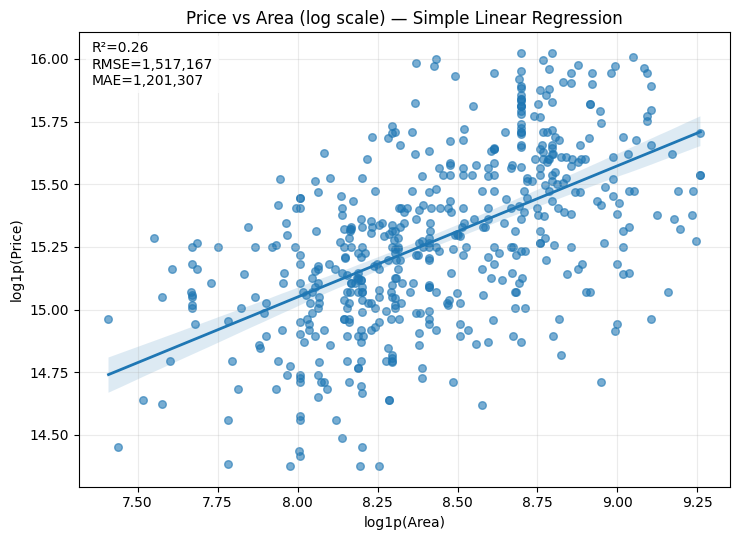

In [7]:
# ==========================================
# Price vs Area — Clean Plot with Metrics
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# ---------- 0) Helpers ----------
def rmse_score(y_true, y_pred):
    """Version-safe RMSE."""
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

def iqr_mask(series, k=1.5):
    """True for non-outliers by IQR rule."""
    q1, q3 = np.nanpercentile(series, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return (series >= low) & (series <= high)

# ---------- 1) Load / prepare ----------
# If you already have df, comment these two lines.
CSV_PATH = "Housing.csv"   # <-- change if needed
df = pd.read_csv(CSV_PATH)

# Ensure numeric
for c in ["price", "area"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.dropna(subset=["price", "area"]).copy()

# ---------- 2) Outlier removal (IQR on BOTH price & area) ----------
mask = iqr_mask(df["price"], k=1.5) & iqr_mask(df["area"], k=1.5)
df_clean = df.loc[mask].copy()

print(f"Rows: original={len(df)}, after IQR clean={len(df_clean)}")

# ---------- 3) Choose scale ----------
USE_LOG = True  # set False to keep raw scale

if USE_LOG:
    df_clean["x"] = np.log1p(df_clean["area"])
    df_clean["y"] = np.log1p(df_clean["price"])
    x_label = "log1p(Area)"
    y_label = "log1p(Price)"
    title_suffix = " (log scale)"
else:
    df_clean["x"] = df_clean["area"]
    df_clean["y"] = df_clean["price"]
    x_label = "Area"
    y_label = "Price"
    title_suffix = ""

# ---------- 4) Fit model + metrics (train/test) ----------
X = df_clean[["x"]].values
y = df_clean["y"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression().fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

# Metrics in the modeling scale
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = rmse_score(y_test, y_pred_test)

# Also compute metrics in ORIGINAL price units (nice for log models)
if USE_LOG:
    # Back-transform predictions and y_test
    y_test_bt = np.expm1(y_test)
    y_pred_bt = np.expm1(y_pred_test)
    r2_bt = r2_score(y_test_bt, y_pred_bt)
    mae_bt = mean_absolute_error(y_test_bt, y_pred_bt)
    rmse_bt = rmse_score(y_test_bt, y_pred_bt)
else:
    r2_bt, mae_bt, rmse_bt = r2, mae, rmse

print("\n=== Test Metrics ===")
print(f"R² (model scale): {r2:.3f}")
print(f"MAE (model scale): {mae:.2f}")
print(f"RMSE (model scale): {rmse:.2f}")
if USE_LOG:
    print(f"R² (original price): {r2_bt:.3f}")
    print(f"MAE (original price): {mae_bt:,.0f}")
    print(f"RMSE (original price): {rmse_bt:,.0f}")

# ---------- 5) Plot with reg line + 95% CI ----------
plt.figure(figsize=(7.5, 5.5))
sns.regplot(
    x="x", y="y", data=df_clean,
    ci=95, line_kws={"lw": 2}, scatter_kws={"s": 30, "alpha": 0.6}
)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f"Price vs Area{title_suffix} — Simple Linear Regression")

# annotate metrics on the plot (use original-price metrics if log)
metrics_text = (f"R²={r2_bt:.2f}\n"
                f"RMSE={rmse_bt:,.0f}\n"
                f"MAE={mae_bt:,.0f}") if USE_LOG else \
               (f"R²={r2:.2f}\nRMSE={rmse:,.0f}\nMAE={mae:,.0f}")

plt.text(
    0.02, 0.98, metrics_text,
    transform=plt.gca().transAxes, va="top", ha="left",
    fontsize=10, bbox=dict(facecolor="white", alpha=0.8, edgecolor="none")
)

plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# ---------- 6) (Optional) Plot on RAW scale too for comparison ----------
# Flip this to True if you want a second figure on raw scale alongside.
PLOT_RAW_TOO = False
if PLOT_RAW_TOO and USE_LOG:
    plt.figure(figsize=(7.5, 5.5))
    sns.regplot(
        x="area", y="price", data=df_clean,
        ci=95, line_kws={"lw": 2}, scatter_kws={"s": 30, "alpha": 0.6}
    )
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title("Price vs Area (raw scale) — Simple LR")
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()


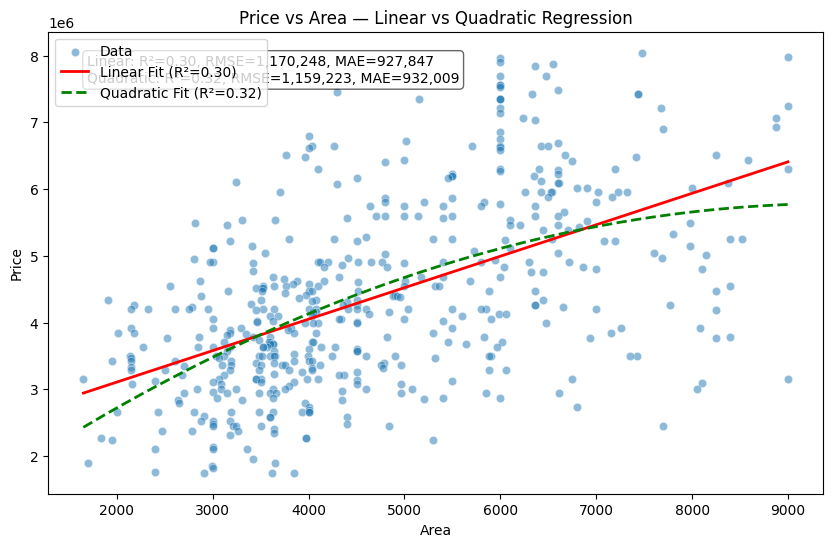

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Example helper for outlier removal (IQR method) ---
def iqr_mask(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return (series >= lower) & (series <= upper)

# --- Load your dataset (replace with actual df if already loaded) ---
# df = pd.read_csv("your_data.csv")

# Take only area & price
df = df[["area", "price"]].dropna()

# Outlier removal (stricter k=1.0)
mask = iqr_mask(df["area"], k=1.0) & iqr_mask(df["price"], k=1.0)
df_clean = df.loc[mask]

X = df_clean[["area"]].values
y = df_clean["price"].values

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

r2_lin = r2_score(y, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
mae_lin = mean_absolute_error(y, y_pred_lin)

# --- Quadratic Regression ---
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_pred_quad = poly_model.predict(X)

r2_quad = r2_score(y, y_pred_quad)
rmse_quad = np.sqrt(mean_squared_error(y, y_pred_quad))
mae_quad = mean_absolute_error(y, y_pred_quad)

# --- Plot ---
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_clean["area"], y=df_clean["price"], alpha=0.5, label="Data")

# Smooth curve for fits
xx = np.linspace(df_clean["area"].min(), df_clean["area"].max(), 300).reshape(-1, 1)
yy_lin = lin_reg.predict(xx)
yy_quad = poly_model.predict(xx)

plt.plot(xx, yy_lin, color="red", linewidth=2, label=f"Linear Fit (R²={r2_lin:.2f})")
plt.plot(xx, yy_quad, color="green", linewidth=2, linestyle="--", 
         label=f"Quadratic Fit (R²={r2_quad:.2f})")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area — Linear vs Quadratic Regression")
plt.legend()

# Add metrics text box
textstr = (f"Linear: R²={r2_lin:.2f}, RMSE={rmse_lin:,.0f}, MAE={mae_lin:,.0f}\n"
           f"Quadratic: R²={r2_quad:.2f}, RMSE={rmse_quad:,.0f}, MAE={mae_quad:,.0f}")
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, 
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ---- Helper: IQR mask ----
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return (s >= lo) & (s <= hi)

# ---- If df already exists, keep it. Otherwise load your CSV ----
# df = pd.read_csv("Housing.csv")

# Make sure columns are numeric
for c in ["price", "bedroom"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df_pair = df[["bedroom", "price"]].dropna().copy()

# Bedrooms is discrete; still trim extreme price/bedroom outliers
mask = iqr_mask(df_pair["bedroom"], k=1.5) & iqr_mask(df_pair["price"], k=1.5)
df_clean = df_pair.loc[mask].copy()

X = df_clean[["bedroom"]].values
y = df_clean["price"].values

# ---- Linear fit ----
lin = LinearRegression().fit(X, y)
y_pred_lin = lin.predict(X)
r2_lin  = r2_score(y, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
mae_lin  = mean_absolute_error(y, y_pred_lin)

# ---- Quadratic fit ----
quad = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
y_pred_quad = quad.predict(X)
r2_quad  = r2_score(y, y_pred_quad)
rmse_quad = np.sqrt(mean_squared_error(y, y_pred_quad))
mae_quad  = mean_absolute_error(y, y_pred_quad)

# ---- Plot ----
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_clean["bedroom"], y=df_clean["price"], alpha=0.6, s=35, label="Data")

xx = np.linspace(df_clean["bedroom"].min(), df_clean["bedroom"].max(), 300).reshape(-1, 1)
yy_lin  = lin.predict(xx)
yy_quad = quad.predict(xx)

plt.plot(xx, yy_lin, color="red", lw=2, label=f"Linear Fit (R²={r2_lin:.2f})")
plt.plot(xx, yy_quad, color="green", lw=2, ls="--", label=f"Quadratic Fit (R²={r2_quad:.2f})")

plt.xlabel("Bedroom")
plt.ylabel("Price")
plt.title("Price vs Bedrooms — Linear vs Quadratic Regression")
plt.legend()

text = (f"Linear:   R²={r2_lin:.2f},  RMSE={rmse_lin:,.0f},  MAE={mae_lin:,.0f}\n"
        f"Quadratic: R²={r2_quad:.2f}, RMSE={rmse_quad:,.0f}, MAE={mae_quad:,.0f}")
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
               va="top", ha="left", fontsize=10,
               bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


KeyError: 'bedroom'

In [12]:
df.columns

Index(['area', 'price'], dtype='object')